<a href="https://colab.research.google.com/github/keehyun2/TestPy/blob/master/colab/7-1-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

In [2]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [3]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [6]:
# training(60,000개), test(10,000개) data 가 6:1 의 비율로 준비가됨.

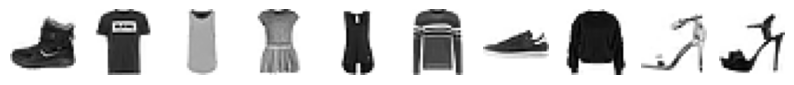

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10)) # 1행, 10열의 subplot 을 생성
for i in range(10): # 10개의 훈련 데이터를 이미지 출력 (28 by 28)
    axs[i].imshow(train_input[i], cmap='gray_r')  # 색 반전
    axs[i].axis('off')
plt.show()

In [8]:
print([train_target[i] for i in range(10)]) # 이미지 분류코드 출력?

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [9]:
import numpy as np

print(np.unique(train_target, return_counts=True)) # 각 종류별 개수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [10]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
# 픽셀하나는 0~255 까지의 밝기를 표현함. 이를 (0~1) 사이의 실수로 정규화
# 이후에 이미지 2d array(28 by 28) 를 1d array(784) 로 변환 (평탄화) (신경망 입력 형식에 맞춤)

In [11]:
print(train_scaled.shape)

(60000, 784)


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# 확률적 경사하강법(SGD) 기반의 로지스틱 회귀 모델 생성

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


## 인공신경망

### 텐서플로와 케라스

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [15]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# 훈련 데이터를 다시 훈련/검증 세트로 분리 (검증 정확도 측정용)

In [16]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [18]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# Dense: 완전 연결 계층
# 출력 뉴런 10개 (10종류 의류), 소프트맥스 활성화 함수 사용 → 다중 클래스 분류

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model = keras.Sequential([dense])
# 은닉층 없이 바로 출력층만 있는 단순한 신경망 모델

## 인공신경망으로 패션 아이템 분류하기

In [20]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 손실 함수: 희소 범주형 크로스엔트로피 (정수형 라벨이므로 sparse_)

In [21]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [26]:
history = model.fit(train_scaled, train_target, epochs=5)
# 5 에폭 동안 훈련

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8552 - loss: 0.4277
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8570 - loss: 0.4232
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8579 - loss: 0.4197
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8592 - loss: 0.4169
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8597 - loss: 0.4145


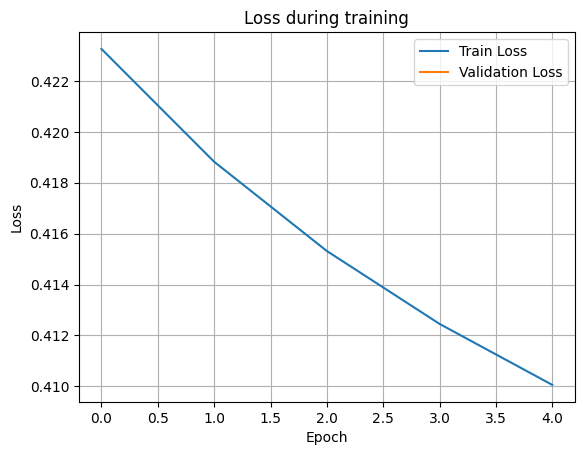

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()
plt.grid(True)
plt.show()

# 학습 중 손실 함수 변화 시각화

In [23]:
model.evaluate(val_scaled, val_target)
# 검증 세트로 모델의 최종 정확도 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

In [24]:
# 0.4444445073604584 --> loss – 손실 함수 값 (sparse_categorical_crossentropy)
# → 모델이 예측한 확률 분포와 실제 레이블 사이의 평균 오차

# 0.8458333611488342 --> accuracy – 정확도 (accuracy)
# → 전체 검증 데이터 중에서 예측이 맞은 샘플의 비율

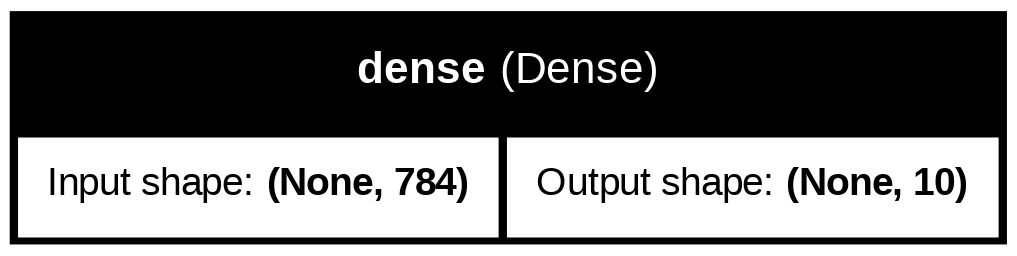

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)
# 인공신경망의 구조 (층, 노드 등) 시각화